In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/high_diamond_ranked_10min.csv')

df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [3]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [7]:
df_clean = df.drop(['gameId', 'redFirstBlood', 'redKills', 'redDeaths', 'redGoldDiff', 'redExperienceDiff', 
                    'blueTotalGold', 'redTotalGold', 'blueTotalMinionsKilled', 'redTotalMinionsKilled'], axis=1)
                    
df_clean = df_clean.rename(columns={'blueWins': 'winner', 'blueFirstBlood': 'firstBlood', 
                                    'blueKills': 'blueKills/redDeaths', 'blueDeaths': 'redKills/blueDeaths', 
                                    'blueGoldDiff': 'goldDiff', 'blueExperienceDiff': 'experienceDiff'})

df_clean

,winner,blueWardsPlaced,blueWardsDestroyed,firstBlood,blueKills/redDeaths,redKills/blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,8,0,0,0,0,6.8,17047,55,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,2,2,1,1,1,6.8,17438,52,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,14,0,0,0,0,6.8,17254,28,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,10,0,0,0,0,7.0,17961,47,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,7,1,1,0,0,7.0,18313,67,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,7,0,0,0,0,6.8,16498,34,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,3,0,0,0,0,7.0,18367,56,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,11,1,1,0,0,7.4,19909,60,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,1,0,0,0,0,7.2,18314,40,24.7,1529.8


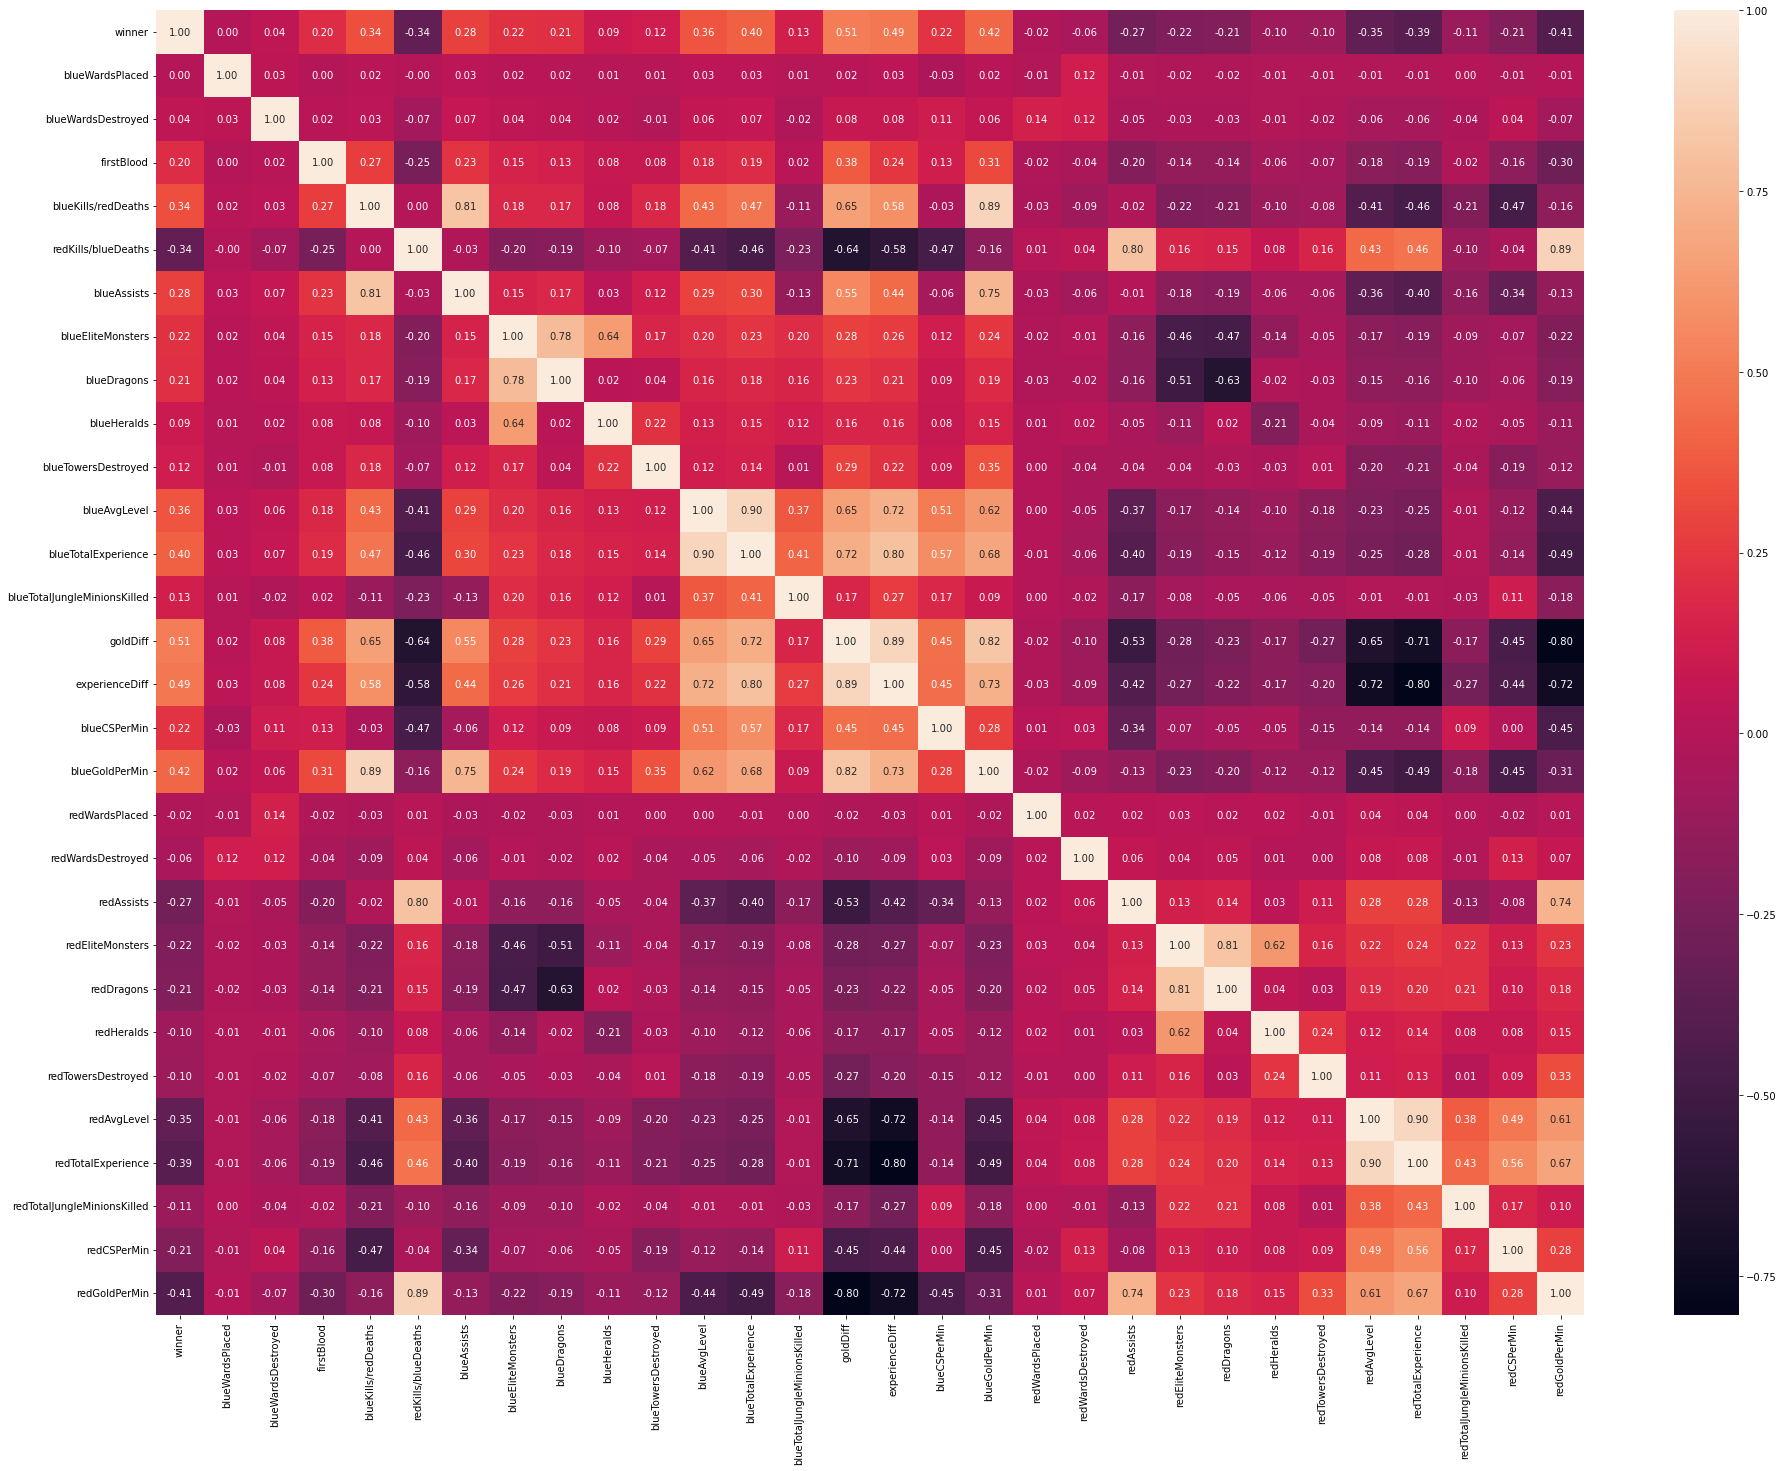

In [8]:
# sns.heatmap(df_clean.corr())
plt.figure(figsize=(32, 24))
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f')
plt.show()

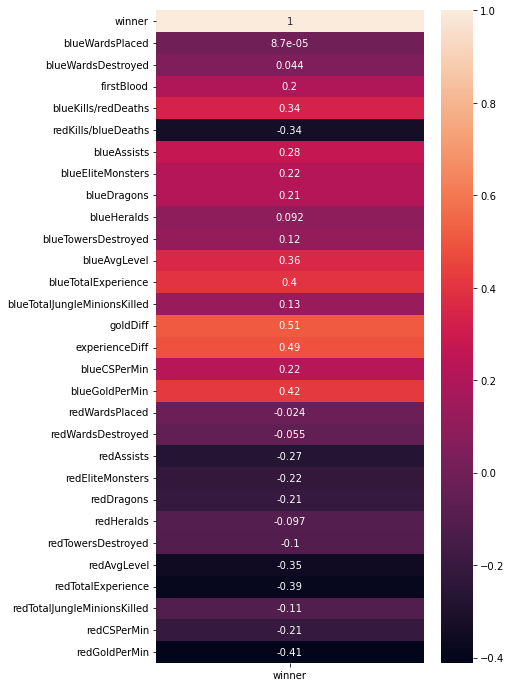

In [9]:
plt.figure(figsize=(6, 12))
sns.heatmap(df_clean.corr()[['winner']], annot=True)
plt.show()

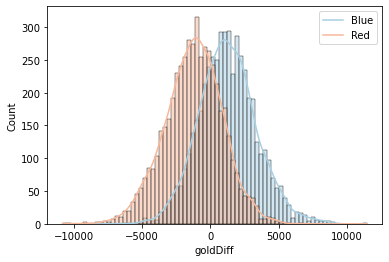

In [10]:
sns.histplot(data=df_clean, x='goldDiff',hue='winner', palette='RdBu',kde=True)
plt.legend(labels=['Blue', 'Red'])
plt.show()

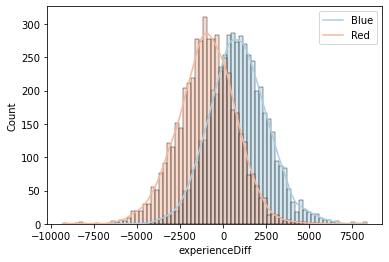

In [11]:
sns.histplot(data=df_clean, x='experienceDiff',hue='winner', palette='RdBu',kde=True)
plt.legend(labels=['Blue', 'Red'])
plt.show()